## load mnist dataset

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784" , as_frame=False)

In [3]:
X , y = mnist.data , mnist.target
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [4]:
X.shape # 7000 images , 784 features

(70000, 784)

In [5]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [6]:
y.shape

(70000,)

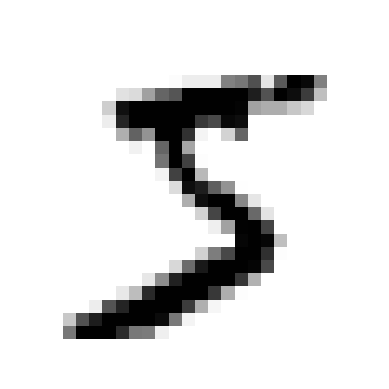

In [7]:
import matplotlib.pyplot as plt
def plot_digit(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image , cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [8]:
y[0]

'5'

In [9]:
X_train , X_test , y_train , y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [10]:
y_train_5 = (y_train=='5')
y_test_5 = (y_test=='5')

##  stochastic gradient descent (SGD)

In [11]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train , y_train_5)

SGDClassifier(random_state=42)

In [12]:
sgd_clf.predict([some_digit])

array([ True])

## Performance Measure

In [13]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf , X_train , y_train_5 , cv = 3 , scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

## Dummy clasifier

In [14]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train , y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [15]:
cross_val_score(dummy_clf , X_train, y_train_5 , cv=3 , scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

## Confusion Matrix

In [16]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf , X_train , y_train_5 , cv = 3)

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5 , y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

# Precision and Recall

In [18]:
from sklearn.metrics import precision_score , recall_score
precision_score(y_train_5 , y_train_pred)

0.8370879772350012

In [19]:
recall_score(y_train_5 , y_train_pred)

0.6511713705958311

# f1_score

In [20]:
# f1_score --> combine(precision + recall)
from sklearn.metrics import f1_score
f1_score(y_train_5 , y_train_pred)

0.7325171197343847

## Precision/Recall trade-off

In [21]:
y_scores =sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [22]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

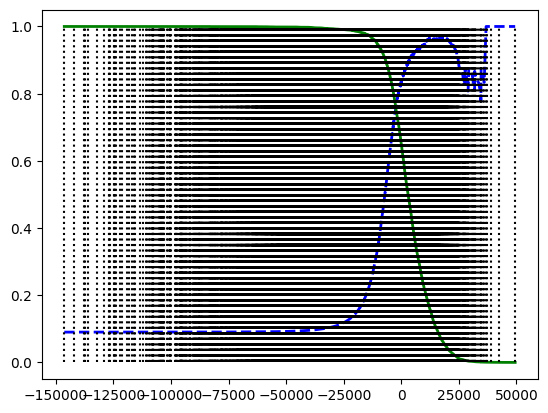

In [23]:
from sklearn.metrics import precision_recall_curve
y_scores = cross_val_predict(sgd_clf , X_train , y_train_5 ,
                            cv=3 , method="decision_function")

precisions , recalls , thresholds = precision_recall_curve(y_train_5 , y_scores)

plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(thresholds, 0, 1.0, "k", "dotted", label="threshold")

# RandomForestClassifier

In [24]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

In [25]:
y_probas_forest = cross_val_predict(forest_clf , X_train , y_train_5,cv=3 , method="predict_proba")
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

In [26]:
y_scores_forest = y_probas_forest[:, 1]
precisions_forest , recalls_forest , thresholds_forest = precision_recall_curve(
    y_train_5 , y_scores_forest)

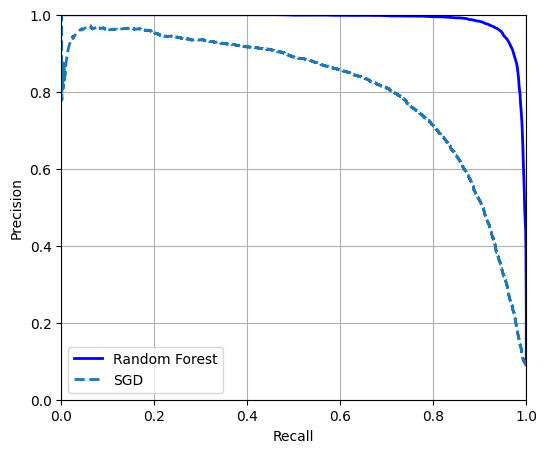

In [27]:
plt.figure(figsize=(6, 5))  

plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")


plt.show()

## Multiclass Classification

In [28]:
from sklearn.svm import SVC
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:200] , y_train[:200])

SVC(random_state=42)

In [29]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [30]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 1.76,  3.85,  6.13,  8.27,  0.75,  9.29, -0.25,  2.79,  7.12,
         4.84]])

In [31]:
class_id = some_digit_scores.argmax()
class_id

5

In [32]:
svm_clf.classes_ , svm_clf.classes_[class_id]


(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object), '5')

## OVR strategy

In [33]:
from sklearn.multiclass import OneVsRestClassifier 
ovr_clf = OneVsRestClassifier(SVC(random_state=42)) 
ovr_clf.fit(X_train[:2000], y_train[:2000])
ovr_clf.predict([some_digit]) 

array(['5'], dtype='<U1')

In [34]:
len(ovr_clf.estimators_) 

10

In [35]:
sgd_clf = SGDClassifier(random_state=42) 
sgd_clf.fit(X_train, y_train) 
sgd_clf.predict([some_digit]) 

array(['3'], dtype='<U1')

In [36]:
sgd_clf.decision_function([some_digit]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

In [37]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy") 

array([0.87365, 0.85835, 0.8689 ])

In [38]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform(X_train.astype("float64")) 
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, 
scoring="accuracy") 

array([0.8983, 0.891 , 0.9018])

## Error Analysis

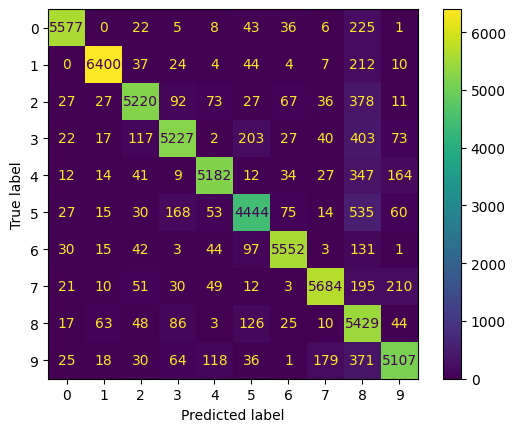

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf , X_train_scaled , y_train , cv=3)
ConfusionMatrixDisplay.from_predictions(y_train , y_train_pred)
plt.show()

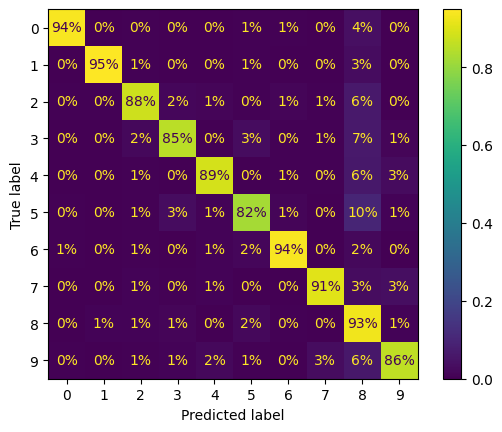

In [43]:
ConfusionMatrixDisplay.from_predictions(y_train , y_train_pred , normalize='true', values_format=".0%") # 82% of the images of 5s were classified correctly. 
plt.show()

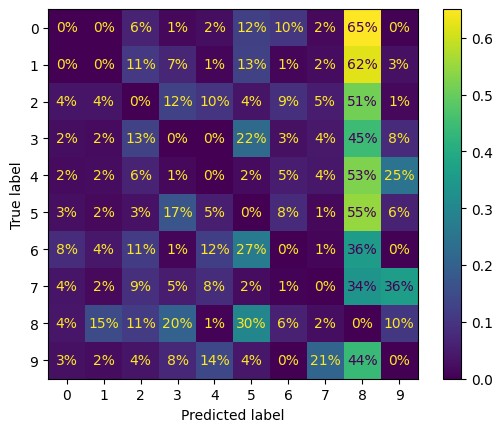

In [44]:
# putting Zero weight on the correct predictions
# confusion matrix with errors only

sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train , y_train_pred , sample_weight=sample_weight , 
                                        normalize="true" , values_format=".0%")
plt.show()

## Multilabel Classification

In [49]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= '7' )
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_multilabel = np.c_[y_train_large , y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train , y_multilabel)

KNeighborsClassifier()

In [50]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [52]:
# Compute average f1 score
y_train_knn_pred = cross_val_predict(knn_clf , X_train , y_multilabel , cv=3)
f1_score(y_multilabel , y_train_knn_pred , average="micro")

0.9778680286341354

In [53]:
from sklearn.multioutput import ClassifierChain

chain_clf = ClassifierChain(SVC() , cv=3 , random_state=42)
chain_clf.fit(X_train[:2000] , y_multilabel[:2000])
chain_clf.predict([some_digit])

array([[0., 1.]])

In [55]:
# multioutput
# add some noise to the dataset

np.random.seed(42)
noise = np.random.randint(0 ,100 , (len(X_train) , 784))
X_train_mod = X_train + noise
noise = np.random.randint(0,100 , (len(X_test) , 784))
X_test_mod = X_test + noise
y_train_mod = X_train 
y_test_mod = X_test

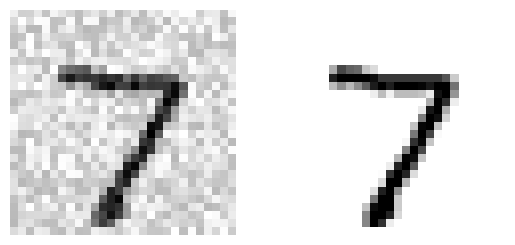

In [56]:
plt.subplot(121); plot_digit(X_test_mod[0])
plt.subplot(122); plot_digit(y_test_mod[0])
plt.show()

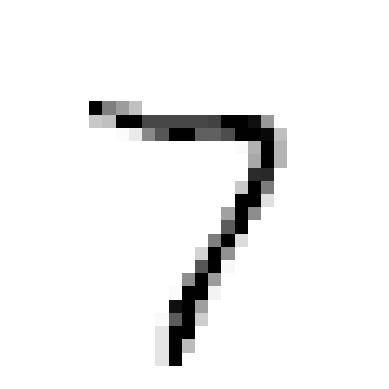

In [57]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod , y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit)
plt.show()

## Classifier with accuracy over 97%

In [58]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train , y_train)
baseline_accuracy = knn_clf.score(X_test , y_test)
baseline_accuracy

0.9688

In [60]:
# train 10,000 images
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform" , "distance"] , 'n_neighbors' :[3,4,5,6]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf , param_grid , cv=3)
grid_search.fit(X_train[:10000] , y_train[:10000])

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5, 6],
                          'weights': ['uniform', 'distance']}])

In [61]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [62]:
grid_search.best_score_

0.9397994088551026

In [63]:
# full training set
grid_search.best_estimator_.fit(X_train , y_train)
tuned_accuracy = grid_search.score(X_test , y_test)
tuned_accuracy

0.9714